In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from pyRemoval.processing.extract import facial_roi

In [2]:
def apply_filter(input_path, output_path, roi_func, notebook_mode=False):
    '''
    This function processes a video with a single filter.

    Parameters:
        input_path (str): Path of the input video.
        output_path (str): Path of the output video.
        filter_func (function): Filter function to be applied.
        filter_temporal (string): Name of the temporal filter.
        roi_func (function): ROI function to be applied.
        filter_params (dict): Dictionary containing the parameters for the filter.
        notebook_mode (bool): Whether to run in notebook mode.

    Returns:
        None
    '''
    print('Starting video conversion...', end='\n\n')

    # read video
    cap = cv2.VideoCapture(input_path)

    # get the frame width and height
    frame_width = int(cap.get(3))
    frame_height = int(cap.get(4))
    input_fps = cap.get(cv2.CAP_PROP_FPS)
    total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)

    # define codec and create VideoWriter object
    out = cv2.VideoWriter(output_path, 0, input_fps, (frame_width, frame_height))

    total_frames_proc = 0

    if notebook_mode:
        from tqdm.notebook import tqdm
    else:
        from tqdm import tqdm

    # t = n/(fps*60)
    # sinusoid = A*sin(2pi*100*t)

    t = np.arange(total_frames)/(input_fps*60)
    sinusoid = 2*np.sin(2*np.pi*100*t)

    # create tqdm progress bar
    with tqdm(total=total_frames) as pbar:
        # read until end of video
        while cap.isOpened():
            # capture each frame of the video
            ret, frame = cap.read()

            if ret:
                total_frames_proc += 1

                # convert to rgb
                frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

                # generate roi mask
                roi_mask = roi_func(frame_rgb, frame_height, frame_width)

                # add filter
                frame_copy = frame.copy()

                # extract rgb
                (B, G, R) = cv2.split(frame_copy.astype("float"))

                # inject sinusoid
                G += sinusoid[total_frames_proc-1]

                # merge the channels back together and convert back to image (uint8)
                frame_copy = cv2.merge([B, G, R]).astype("uint8")

                # extract the mask area from the edited frame
                face_edited = cv2.bitwise_and(frame_copy, frame_copy, mask=roi_mask)

                # extract the are not in roi from unedited frame
                mask_not = cv2.bitwise_not(roi_mask)
                frame_full = cv2.bitwise_and(frame, frame, mask=mask_not)

                # paste the filtered face region back on the original frame
                final_frame = cv2.add(face_edited, frame_full)

                # write the frame to the output file
                out.write(final_frame)
                
                # update progress bar
                pbar.update(1)
            else:
                break
    # release Video Capture
    cap.release()

    # release Video 
    out.release()
    # close all frames and video windows
    cv2.destroyAllWindows()

    print('Conversion completed successfully!')
    print('Video saved at: {}'.format(output_path))

In [3]:
input_path = 'data/sample_video.avi'

In [4]:
def display_frame_from_video(input_path, title=None):
    '''
    This functions display a frame from the video at the half point of the video.

    This function is only for the purpose of demonstration in this notebook.
    '''
    # Read the Video (Change the filename as per your file)
    cap = cv2.VideoCapture(input_path)

    # Get the total number of frames
    length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    half_point = length//2 # Approximately half if number of frames are odd

    # Set the reader to the given frame number (half_point)
    cap.set(cv2.CAP_PROP_POS_FRAMES, half_point)

    # Read the frame
    ret, frame = cap.read()

    # Release the file pointer
    cap.release()

    # convert the frame from BGR to RGB color space
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # normalize the frame
    frame_rgb = frame_rgb / 255.0

    # display the frame using matplotlib
    if title:
        plt.title(title)
    plt.axis('off')
    plt.imshow(frame_rgb)

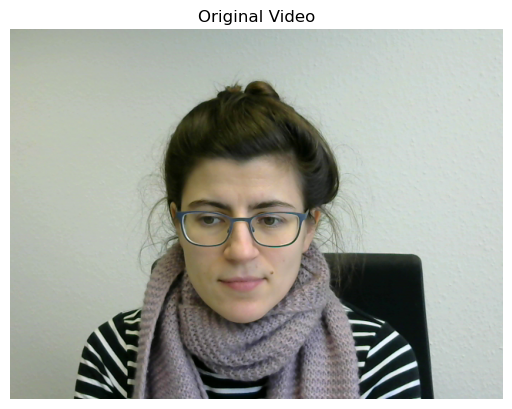

In [5]:
frame = display_frame_from_video(input_path, title='Original Video')

In [5]:
roi_func = facial_roi # Face - (Mouth + Eyes)

In [7]:
output_path = '~/Desktop/sinusoid.avi'
apply_filter(input_path, output_path, roi_func, notebook_mode=True)
# frame = display_frame_from_video(output_path, title='Sinusoid Video')

Starting video conversion...



[ERROR:0@83.829] global cap.cpp:645 open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.9.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/videoio/src/cap_images.cpp:430: error: (-215:Assertion failed) !filename_pattern.empty() in function 'open'




  0%|          | 0/125.0 [00:00<?, ?it/s]

I0000 00:00:1729601716.212633  717981 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-20.7.2), renderer: Intel(R) Iris(TM) Plus Graphics 640
W0000 00:00:1729601716.222579  720466 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1729601716.271537  720467 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1729601716.329971  717981 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-20.7.2), renderer: Intel(R) Iris(TM) Plus Graphics 640
W0000 00:00:1729601716.335635  720474 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1729601716.355736  720473 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback ten

Conversion completed successfully!
Video saved at: ~/Desktop/sinusoid.avi


I0000 00:00:1729601725.354960  717981 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-20.7.2), renderer: Intel(R) Iris(TM) Plus Graphics 640
W0000 00:00:1729601725.359783  721152 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1729601725.374268  721151 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
I0000 00:00:1729601725.418770  717981 gl_context.cc:357] GL version: 2.1 (2.1 INTEL-20.7.2), renderer: Intel(R) Iris(TM) Plus Graphics 640
W0000 00:00:1729601725.421989  721158 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1729601725.437777  721156 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback ten